1
['asteroids', 'earth', 'elliptical', 'jupiter', 'mars', 'mercury', 'moon', 'neptune', 'saturn', 'spiral', 'uranus', 'venus']


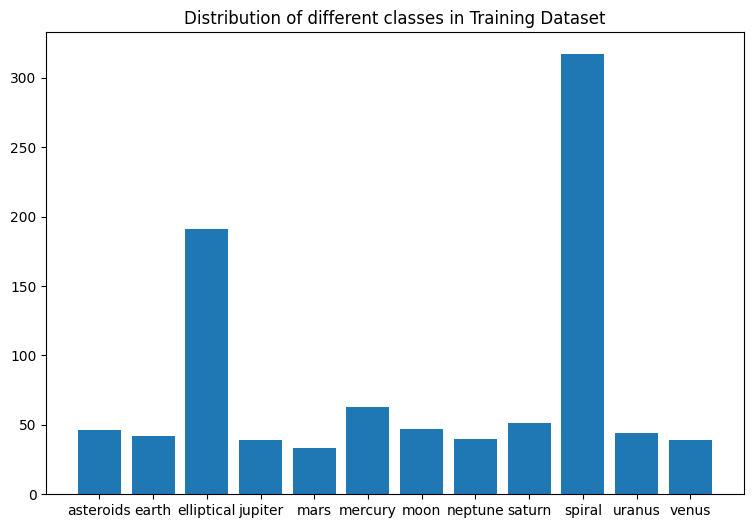

In [52]:
import os
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.image import imread
import keras

warnings.filterwarnings('ignore')
# Get all the paths
data_directory = os.listdir('/Users/kevinmathew/Documents/UoL CNN/hub/examples/image_retraining/training_data')
path, dirs, files = next(os.walk("/Users/kevinmathew/Documents/UoL CNN/hub/examples/image_retraining/training_data"))
file_count = len(files)
print(file_count)

test_data = os.listdir("/Users/kevinmathew/Documents/UoL CNN/hub/examples/image_retraining/test_data")


# Making new base directory
original_dataset_dir = "/Users/kevinmathew/Documents/UoL CNN/hub/examples/image_retraining/training_data"
base_dir = "/Users/kevinmathew/Documents/UoL CNN/hub/examples/image_retraining"


image_folder = ['asteroids', 'earth','elliptical', 'jupiter', 'mars', 'mercury', 'moon', 'neptune', 'saturn', 'spiral', 'uranus', 'venus']

nimgs = {}
if '.DS_Store' in image_folder:
  image_folder.remove('.DS_Store')
for i in image_folder:
    nimages = len(os.listdir("/Users/kevinmathew/Documents/UoL CNN/hub/examples/image_retraining/training_data/"+i+'/'))
    nimgs[i]=nimages
print(image_folder)    
plt.figure(figsize=(9, 6))
plt.bar(range(len(nimgs)), list(nimgs.values()), align='center')
plt.xticks(range(len(nimgs)), list(nimgs.keys()))
plt.title('Distribution of different classes in Training Dataset')
plt.show()

In [53]:
for i in ['asteroids', 'earth','elliptical', 'jupiter', 'mars', 'mercury', 'moon', 'neptune', 'saturn', 'spiral', 'uranus', 'venus']:
    print('Training {} images are: '.format(i)+str(len(os.listdir('/Users/kevinmathew/Documents/UoL CNN/hub/examples/image_retraining/training_data/'+i+'/'))))
     

Training asteroids images are: 46
Training earth images are: 42
Training elliptical images are: 191
Training jupiter images are: 39
Training mars images are: 33
Training mercury images are: 63
Training moon images are: 47
Training neptune images are: 40
Training saturn images are: 51
Training spiral images are: 317
Training uranus images are: 44
Training venus images are: 39


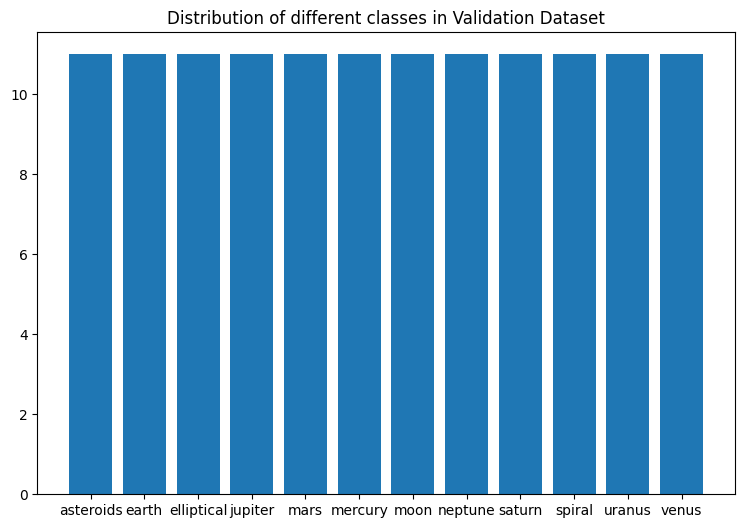

In [54]:

image_folder = ['asteroids', 'earth','elliptical', 'jupiter', 'mars', 'mercury', 'moon', 'neptune', 'saturn', 'spiral', 'uranus', 'venus']
nimgs = {}
if '.DS_Store' in image_folder:
  image_folder.remove('.DS_Store')
for i in image_folder:
    nimages = len(os.listdir('/Users/kevinmathew/Documents/UoL CNN/hub/examples/image_retraining/test_data/'+i+'/'))
    nimgs[i]=nimages
plt.figure(figsize=(9, 6))
plt.bar(range(len(nimgs)), list(nimgs.values()), align='center')
plt.xticks(range(len(nimgs)), list(nimgs.keys()))
plt.title('Distribution of different classes in Validation Dataset')
plt.show()
     

In [55]:
for i in ['asteroids', 'earth','elliptical', 'jupiter', 'mars', 'mercury', 'moon', 'neptune', 'saturn', 'spiral', 'uranus', 'venus']:
    print('Valid {} images are: '.format(i)+str(len(os.listdir('/Users/kevinmathew/Documents/UoL CNN/hub/examples/image_retraining/test_data/'+i+'/'))))

Valid asteroids images are: 11
Valid earth images are: 11
Valid elliptical images are: 11
Valid jupiter images are: 11
Valid mars images are: 11
Valid mercury images are: 11
Valid moon images are: 11
Valid neptune images are: 11
Valid saturn images are: 11
Valid spiral images are: 11
Valid uranus images are: 11
Valid venus images are: 11


In [56]:
import tensorflow as tf
from keras.optimizers import Adam
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from keras.models import Sequential
from keras.callbacks import EarlyStopping, ModelCheckpoint

In [57]:
img_width=256; img_height=256
batch_size=16

In [60]:
TRAINING_DIR = '/Users/kevinmathew/Documents/UoL CNN/hub/examples/image_retraining/training_data/'

if '.DS_Store' in TRAINING_DIR:
  TRAINING_DIR.remove('.DS_Store')

train_datagen = ImageDataGenerator(rescale = 1/255.0,
                                   rotation_range=30,
                                   zoom_range=0.4,
                                   horizontal_flip=True)

train_generator = train_datagen.flow_from_directory(TRAINING_DIR,
                                                    batch_size=batch_size,
                                                    class_mode='categorical',
                                                    target_size=(img_height, img_width))
     

Found 947 images belonging to 12 classes.


In [61]:
VALIDATION_DIR = '/Users/kevinmathew/Documents/UoL CNN/hub/examples/image_retraining/test_data/'
if '.DS_Store' in VALIDATION_DIR:
  VALIDATION_DIR.remove('.DS_Store')

validation_datagen = ImageDataGenerator(rescale = 1/255.0)

validation_generator = validation_datagen.flow_from_directory(VALIDATION_DIR,
                                                              batch_size=batch_size,
                                                              class_mode='categorical',
                                                              target_size=(img_height, img_width)
                                                             )
     

Found 130 images belonging to 12 classes.


In [62]:
callbacks = EarlyStopping(monitor='val_loss', patience=5, verbose=1, mode='auto')
# autosave best Model
best_model_file = '/Users/kevinmathew/Documents/UoL CNN/hub/examples/image_retraining/CNN_best_weights.h5'
best_model = ModelCheckpoint(best_model_file, monitor='val_acc', verbose = 1, save_best_only = True)

In [63]:
model = Sequential([
    Conv2D(16, (3, 3), activation='relu', input_shape=(img_height, img_width, 3)), MaxPooling2D(2, 2),
    Conv2D(32, (3, 3), activation='relu'), MaxPooling2D(2, 2),
    Conv2D(64, (3, 3), activation='relu'),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Conv2D(128, (3, 3), activation='relu'),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Flatten(),
    Dense(512, activation='relu'),
    Dense(512, activation='relu'),
    Dense(12, activation='softmax')
])
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 127, 127, 16)     0         
 2D)                                                             
                                                                 
 conv2d_13 (Conv2D)          (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 62, 62, 32)       0         
 2D)                                                             
                                                                 
 conv2d_14 (Conv2D)          (None, 60, 60, 64)        18496     
                                                                 
 conv2d_15 (Conv2D)          (None, 58, 58, 64)       

In [64]:

model.compile(optimizer='Adam', 
              loss='categorical_crossentropy', 
              metrics =['accuracy'])

In [69]:
history = model.fit(train_generator,
                              epochs=60,
                              verbose=1,
                              validation_data=validation_generator,
                              callbacks = [best_model]
                              )

Epoch 1/60
60/60 [==============================] - 23s 377ms/step - loss: 2.2081 - accuracy: 0.2978 - val_loss: 2.9858 - val_accuracy: 0.0846
Epoch 2/60
60/60 [==============================] - 20s 334ms/step - loss: 1.7973 - accuracy: 0.3485 - val_loss: 2.1473 - val_accuracy: 0.2077
Epoch 3/60
60/60 [==============================] - 21s 357ms/step - loss: 1.5535 - accuracy: 0.3981 - val_loss: 2.1074 - val_accuracy: 0.2692
Epoch 4/60
60/60 [==============================] - 23s 376ms/step - loss: 1.3902 - accuracy: 0.4424 - val_loss: 1.7731 - val_accuracy: 0.4154
Epoch 5/60
60/60 [==============================] - 22s 366ms/step - loss: 1.2158 - accuracy: 0.5037 - val_loss: 2.7075 - val_accuracy: 0.1769
Epoch 6/60
60/60 [==============================] - 23s 382ms/step - loss: 1.2265 - accuracy: 0.5069 - val_loss: 1.3251 - val_accuracy: 0.5000
Epoch 7/60
60/60 [==============================] - 22s 373ms/step - loss: 1.0478 - accuracy: 0.5892 - val_loss: 1.2043 - val_accuracy: 0.5769

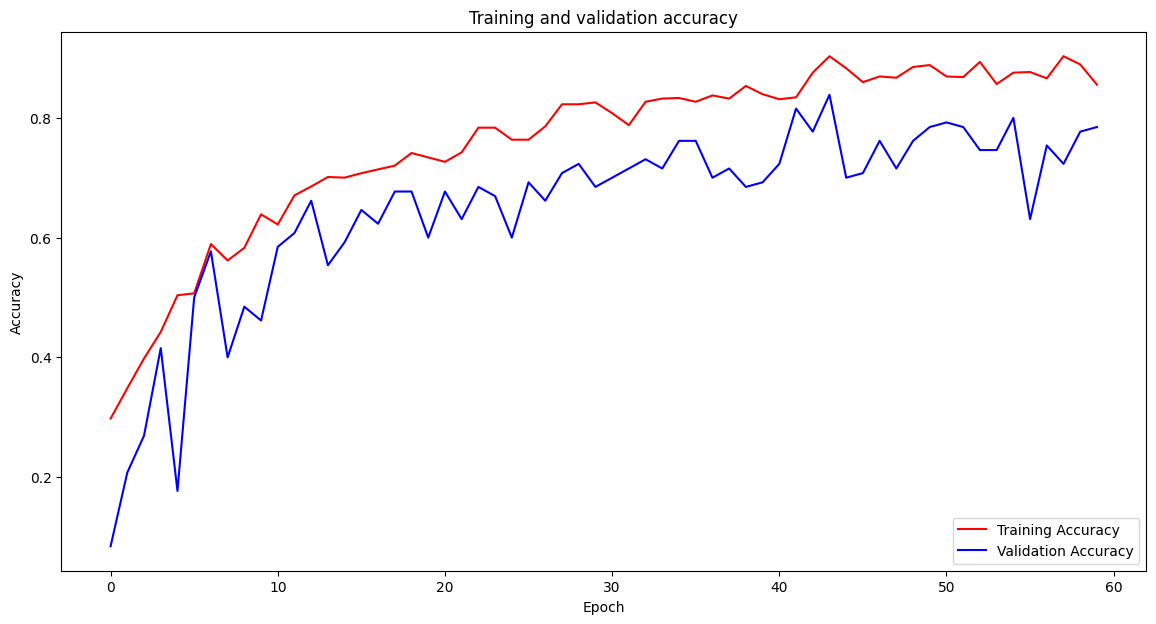

In [73]:

acc=history.history['accuracy']
val_acc=history.history['val_accuracy']
loss=history.history['loss']
val_loss=history.history['val_loss']

epochs=range(len(acc))

fig = plt.figure(figsize=(14,7))
plt.plot(epochs, acc, 'r', label="Training Accuracy")
plt.plot(epochs, val_acc, 'b', label="Validation Accuracy")
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc='lower right')
plt.show()

Text(0.5, 1.0, 'Training and validation loss')

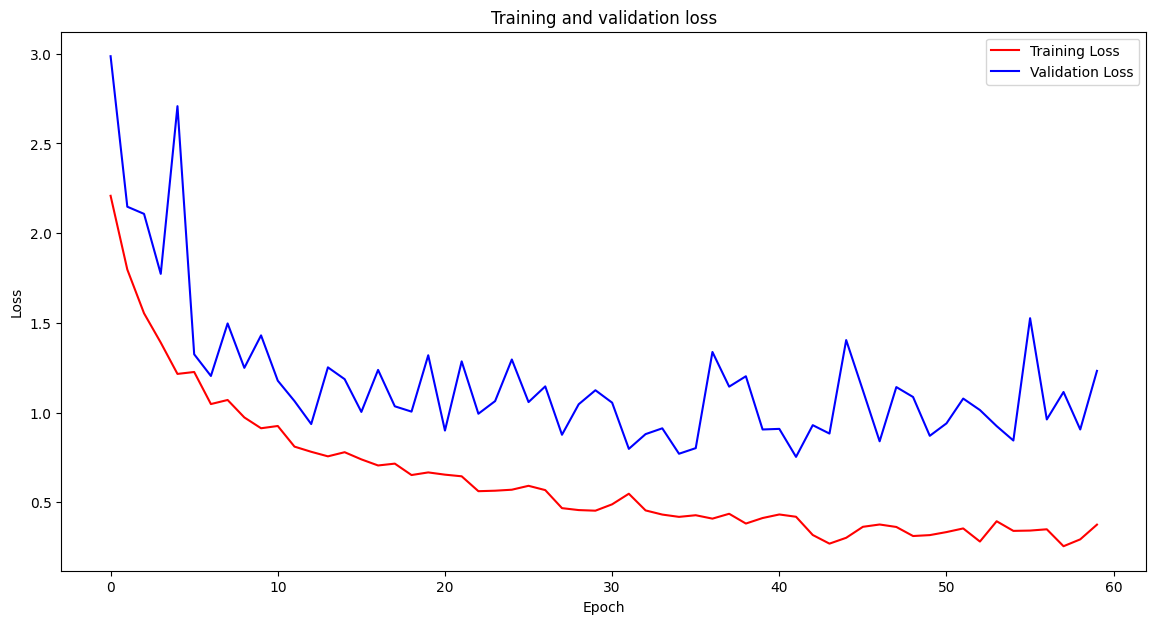

In [74]:

fig2 = plt.figure(figsize=(14,7))
plt.plot(epochs, loss, 'r', label="Training Loss")
plt.plot(epochs, val_loss, 'b', label="Validation Loss")
plt.legend(loc='upper right')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and validation loss')
     

In [75]:

## Test Performance on Test Data
import pandas as pd
import numpy as np
from keras.utils import load_img, img_to_array

def preprocess_image(path):
    img = load_img(path, target_size = (img_height, img_width))
    a = img_to_array(img)
    a = np.expand_dims(a, axis = 0)
    a /= 255.
    return a

In [76]:
# Read Test Images Dir and their labels
test_images_dir = '/Users/kevinmathew/Documents/UoL CNN/hub/examples/image_retraining/lets_test/'
if '.DS_Store' in test_images_dir:
  test_images_dir.remove('.DS_Store')
test_df = pd.read_csv('/Users/kevinmathew/Documents/UoL CNN/hub/examples/image_retraining/test.csv')

# put them in a list
test_dfToList = test_df['Image_id'].tolist()
test_ids = [str(item) for item in test_dfToList]

test_images = [test_images_dir+item for item in test_ids]
test_preprocessed_images = np.vstack([preprocess_image(fn) for fn in test_images])
np.save('/Users/kevinmathew/Documents/UoL CNN/hub/examples/image_retraining/test_preproc_CNN.npy', test_preprocessed_images)

In [77]:

array = model.predict(test_preprocessed_images, batch_size=1, verbose=1)
answer = np.argmax(array, axis=1)
print(answer)

112/112 [==============================] - 1s 7ms/step
[ 0  0  0  5  0  0  0  0  0  0  1  1  1  9  1  1  1  9  1  1  9  9  9  9
  2  2  9  2  9  2  3  3  5  3  2  3  3  3  3  3  4  4 11  2  4  4  4  4
  4  2  5  5  5  5  5  5  5  5  5  5  6  5  6  6  6  6  0  6  0  0  7  7
  7  7  7  7  7  7  7  7  8  8  9  2  9  9  9  9  9  9  9  9 10 10 10 10
 10 10 10 10 10 10 11 11 11 11 11 11 11 11 11 11]


In [78]:

test_df = pd.read_csv('/Users/kevinmathew/Documents/UoL CNN/hub/examples/image_retraining/test.csv')
y_true = test_df['labels']
y_pred = array
print(y_true)

0       0
1       0
2       0
3       0
4       0
       ..
107    11
108    11
109    11
110    11
111    11
Name: labels, Length: 112, dtype: int64


In [79]:

from sklearn.metrics import confusion_matrix, accuracy_score
conf_mat = confusion_matrix(y_true, answer)
conf_mat

array([[ 9,  0,  0,  0,  0,  1,  0,  0,  0,  0,  0,  0],
       [ 0,  8,  0,  0,  0,  0,  0,  0,  0,  2,  0,  0],
       [ 0,  0,  4,  0,  0,  0,  0,  0,  0,  6,  0,  0],
       [ 0,  0,  1,  8,  0,  1,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  2,  0,  7,  0,  0,  0,  0,  0,  0,  1],
       [ 0,  0,  0,  0,  0, 10,  0,  0,  0,  0,  0,  0],
       [ 3,  0,  0,  0,  0,  1,  6,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 10,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  2,  0,  0,  0],
       [ 0,  0,  1,  0,  0,  0,  0,  0,  0,  9,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0, 10,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, 10]])

In [80]:
train_dir = '/Users/kevinmathew/Documents/UoL CNN/hub/examples/image_retraining/training_data'
if '.DS_Store' in train_dir:
  train_dir.remove('.DS_Store')
classes = os.listdir(train_dir)
classes.remove('.DS_Store')

In [81]:
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Reds):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))

    if '.DS_Store' in classes:
        classes.remove('.DS_Store')
    
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        cm = cm.round(2)
        #print("Normalized confusion matrix")
    else:
        cm=cm
        #print('Confusion matrix, without normalization')

    #print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

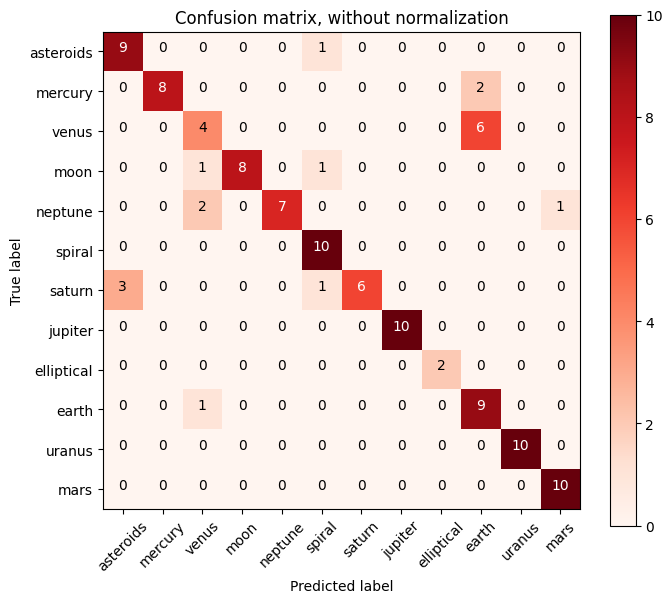

In [82]:
np.set_printoptions(precision=2)

fig1 = plt.figure(figsize=(7,6))
if '.DS_Store' in classes:
    classes.remove('.DS_Store')
plot_confusion_matrix(conf_mat, classes=classes, title='Confusion matrix, without normalization')
plt.show()

In [83]:
accuracy_score(y_true, answer)

0.8303571428571429

In [84]:
model.save('CNN_Model.h5')

In [85]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 127, 127, 16)     0         
 2D)                                                             
                                                                 
 conv2d_13 (Conv2D)          (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 62, 62, 32)       0         
 2D)                                                             
                                                                 
 conv2d_14 (Conv2D)          (None, 60, 60, 64)        18496     
                                                                 
 conv2d_15 (Conv2D)          (None, 58, 58, 64)       

In [40]:
model = keras.models.load_model('/Users/kevinmathew/Documents/UoL CNN/hub/examples/image_retraining/CNN_Model.h5')